<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 9: Web Development for Data Science: Building Restful API with FastAPI (Part I)

The purpose of this [Jupyter Notebook] is to getting you familairized with Building Restful API with FastAPI For Data Science

#  FastAPI Hands-On

Re-test the codes seen in lecture 9 from slide 5 to 28.


In [63]:
import requests

In [64]:
r = requests.get('http://127.0.0.1:8000')
r.json()

{'hello': 'world'}

In [65]:
import httpx

BASE_URL = "http://localhost:8000"


In [66]:
async def test_hello_world():
	async with httpx.AsyncClient() as client:
		response = await client.get(f"{BASE_URL}")
		print(response.json())

In [67]:
await test_hello_world()

{'hello': 'world'}


In [76]:
def request_get(route):
  r = requests.get(f'{BASE_URL}{route}')
  print(f"Status: {r.status_code}")
  print(r.json())

In [85]:
def request_post(route, data = None, files = None):
  if(data):
      r = requests.post(f'{BASE_URL}{route}', data=data)
  elif (files):
      r = requests.post(f'{BASE_URL}{route}', files=files)
  else:
      r = requests.post(f'{BASE_URL}{route}')
  print(f"Status: {r.status_code}")
  print(r.json())

## 4.Advanced Path Parameter Validation (Slide 12)

In [69]:
request_get("/users/admin/123")

Status: 200
{'type': 'admin', 'id': 123}


## 5. String Validation with Regex (Slide 13)

In [70]:
request_get("/license-plates/00154-120-34")

Status: 200
{'license': '00154-120-34'}


In [71]:
request_get("/license-plates/00154--34")

Status: 422
{'detail': [{'type': 'string_pattern_mismatch', 'loc': ['path', 'license'], 'msg': "String should match pattern '^\\d{5}-\\d{3}-\\d{2}$'", 'input': '00154--34', 'ctx': {'pattern': '^\\d{5}-\\d{3}-\\d{2}$'}}]}


## 6. Query Parameters (Slide 14-15)

In [72]:
request_get("/users?page=5&size=50")

Status: 200
{'page': 5, 'size': 50}


## 7. Body Parameters (Slide 16)

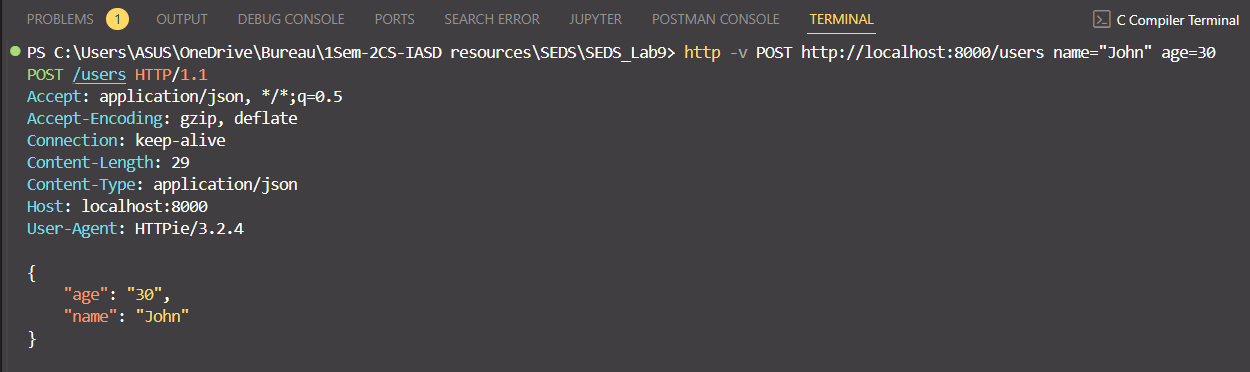

## 8. Form Data (Slide 17)

In [86]:
request_post('/createUser', data = {"name": "Ali", "age": 23})

Status: 200
{'name': 'Ali', 'age': 23}


## 9. File Upload (Slide 18-20)

In [98]:
files = [
  ("files", open("figures/logo-esi-sba.png", "rb")),
]
r = requests.post(f'{BASE_URL}/uploadmultiplefiles', files=files)
r.json()

[{'file_name': 'logo-esi-sba.png', 'content_type': None}]

## 10. Headers and Cookies (Slide 21-24)

In [99]:
request_get('/getheader')

Status: 200
{'user_agent': 'python-requests/2.32.3'}


In [100]:
async def test_header():
	async with httpx.AsyncClient() as client:
		response = await client.get(f"{BASE_URL}/getheader")
		print(response.json())

In [102]:
await test_header()

{'user_agent': 'python-httpx/0.28.0'}


In [103]:
request_get('/setcookie')

Status: 200
{'hello': 'world'}


## 11.HTTP Exceptions (Slide 25)

In [107]:
request_post('/password', data={"password": 'aa', "password_confirm": 'aa'})

Status: 200
{'message': 'Passwords match.'}


## 12. Building a custom HTMLresponse (Slide 26)

In [111]:
r_reply = requests.get(f'{BASE_URL}/reply')
print(r_reply.text)

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>
<body>
  <h1>Hello World</h1>
</body>
</html>


## 13. Dataframes in Templates (Slides 27-28)